👩‍💻 **Author**: Nancy
📫 **Email**: nancydrall06@email.com  
🔗 **LinkedIn**: [linkedin.com/in/nancy2601](https://linkedin.com/in/nancy2601)  
💼 **GitHub**: [https://github.com/nancy2601]

In [8]:
# 🚀 Project Title:
# Public Sentiment on Electric Vehicle (EV) Charging Infrastructure in Indian Tier-1 Cities (Focus: Delhi-NCR)
#🧠 Goal:
#To analyze real public sentiment using Twitter-like data — focusing on Delhi — to understand if people are happy or frustrated 
#with EV charging infrastructure.
#🔧 Tools We'll Use:
#Library	        Why We Use It
#pandas	            Store and handle tweet data
#matplotlib, 
#seaborn	            Charts
#wordcloud	        Visualize common words
#nltk, re	        Text cleaning
#vaderSentiment	    Analyze tweet mood

# Step 1: Simulate 20 Realistic Tweets on EV Charging in Delhi-NCR

In [13]:
import pandas as pd

data = {
    "Date": [
        "2024-06-10", "2024-06-11", "2024-06-11", "2024-06-12", "2024-06-13",
        "2024-06-14", "2024-06-14", "2024-06-15", "2024-06-15", "2024-06-16",
        "2024-06-17", "2024-06-17", "2024-06-18", "2024-06-19", "2024-06-20",
        "2024-06-21", "2024-06-22", "2024-06-22", "2024-06-23", "2024-06-24"
    ],
    "Username": [
        "evlover", "delhiguy", "techsavydelhi", "cleanmobility", "rajivchan",
        "eco_drive_1", "user123", "deepa_noida", "fastchargefan", "nirvanaEV",
        "ncrcomplaints", "urbanmobilityx", "greencapital", "charging_chaos", "savitri_speaks",
        "rohit_neha", "powertalk", "noidagirl", "delhitalks", "silentwheels"
    ],
    "Tweet": [
        "The EV charging station in Connaught Place is always crowded. Need more!",
        "No charging points working at Sarojini Nagar today. Totally disappointed.",
        "Great to see fast EV chargers at Delhi Airport. Kudos!",
        "Charging infrastructure in Gurgaon is improving slowly. Good signs.",
        "Still can't find a working charger in Lajpat Nagar. Waste of time.",
        "Plugged in at Saket Mall — charging was smooth and fast!",
        "Frustrated with the poor maintenance at Noida Sector 18 charging station.",
        "Wish there were more chargers near my office in CyberHub.",
        "Why is the EV charger at Karol Bagh offline every weekend?",
        "Thank you NDMC! EV chargers near India Gate are finally working well.",
        "Terrible experience today. Charger in Rohini stopped midway.",
        "Decent availability of EV stations in Dwarka. Keep it up!",
        "Public-private partnership on EV infra is showing results in Delhi.",
        "Had to wait 45 mins in Mayur Vihar to charge my EV. Not ideal!",
        "Super happy with the new Tata charger in Green Park. Quick and clean.",
        "Charging station at Janakpuri Metro was offline. Again!",
        "More signage needed for EV chargers in CP. Hard to locate.",
        "Charged successfully at DLF Mall Noida. No queue this time!",
        "Delhi’s EV push is real. Loving the convenience now.",
        "Battery low, but the charger at Hauz Khas was a savior today!"
    ]
}

df = pd.DataFrame(data)
df.head(10)


,Date,Username,Tweet
0,2024-06-10,evlover,The EV charging station in Connaught Place is ...
1,2024-06-11,delhiguy,No charging points working at Sarojini Nagar t...
2,2024-06-11,techsavydelhi,Great to see fast EV chargers at Delhi Airport...
3,2024-06-12,cleanmobility,Charging infrastructure in Gurgaon is improvin...
4,2024-06-13,rajivchan,Still can't find a working charger in Lajpat N...
5,2024-06-14,eco_drive_1,Plugged in at Saket Mall — charging was smooth...
6,2024-06-14,user123,Frustrated with the poor maintenance at Noida ...
7,2024-06-15,deepa_noida,Wish there were more chargers near my office i...
8,2024-06-15,fastchargefan,Why is the EV charger at Karol Bagh offline ev...
9,2024-06-16,nirvanaEV,Thank you NDMC! EV chargers near India Gate ar...


#Step 2: Clean the Tweets (Text Preprocessing)
#cleaned the tweets to remove:
#URLs, hashtags, emojis
#Punctuation, extra whitespace
#Mentions, capital letters

In [18]:
import re

def clean_tweet(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Cleaned_Tweet'] = df['Tweet'].apply(clean_tweet)


In [21]:
!pip install vaderSentiment


  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata (572 bytes)
Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


# Step 3: Sentiment Analysis Using VADER

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Tweet'].apply(get_sentiment)


# Step 4: Visualizations
# We’ll do 2 types of visualizations:
# (Bar Plot)
# WordCloud of Most Common Words



# 1 bar plot  Sentiment Distribution

C:\Users\Mamta\AppData\Local\Temp\ipykernel_26372\1747490479.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


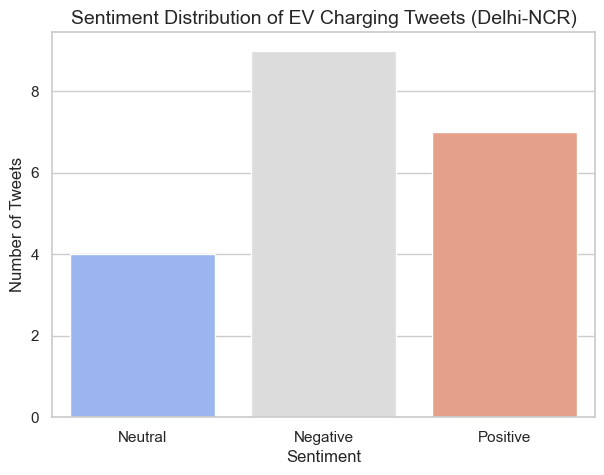

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')

# Titles and labels
plt.title('Sentiment Distribution of EV Charging Tweets (Delhi-NCR)', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# Show plot
plt.show()


2 WordCloud – Most Common Words

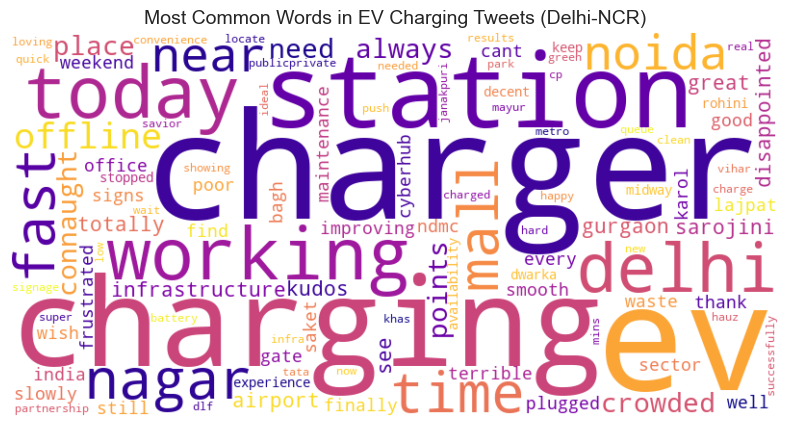

In [30]:
from wordcloud import WordCloud

# Combine all cleaned tweets into a single string
text = ' '.join(df['Cleaned_Tweet'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in EV Charging Tweets (Delhi-NCR)', fontsize=14)
plt.show()


#3. Pie Chart for Sentiment Percentage

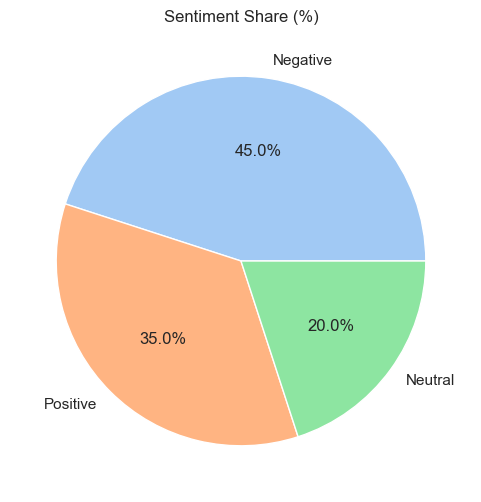

In [32]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sentiment Share (%)')
plt.show()


#4. Length of Tweets vs Sentiment (Box Plot)

C:\Users\Mamta\AppData\Local\Temp\ipykernel_26372\3368724170.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Tweet_Length', palette='Set2')


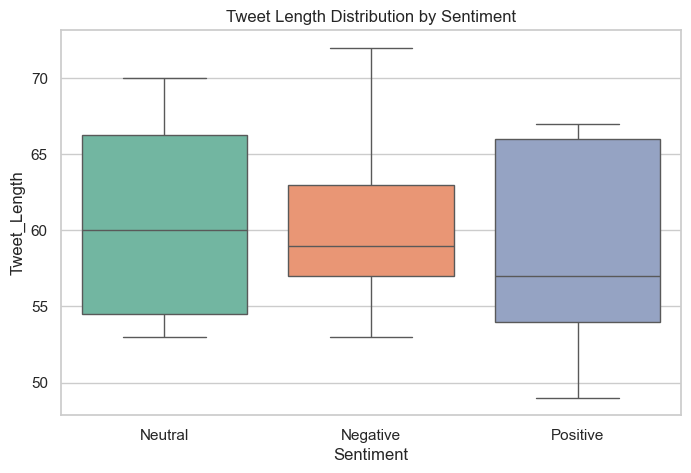

In [34]:
df['Tweet_Length'] = df['Cleaned_Tweet'].apply(len)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sentiment', y='Tweet_Length', palette='Set2')
plt.title('Tweet Length Distribution by Sentiment')
plt.show()


#Histogram of Tweet Lengths

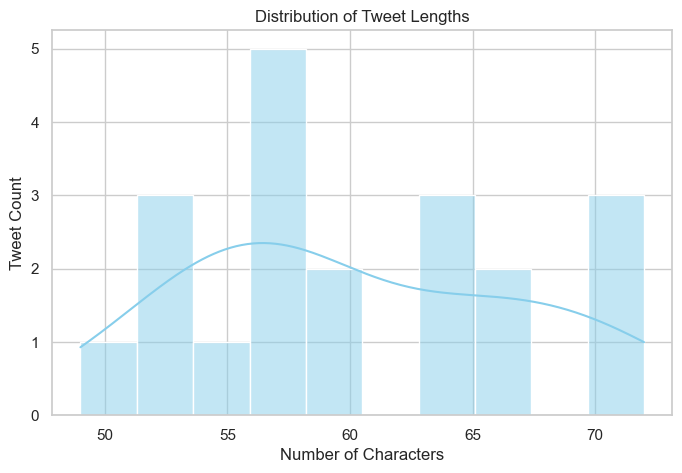

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Tweet_Length'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Tweet Count')
plt.show()


#Bar Plot of Most Common Words (Excluding stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mamta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Mamta\AppData\Local\Temp\ipykernel_26372\358620039.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_d')


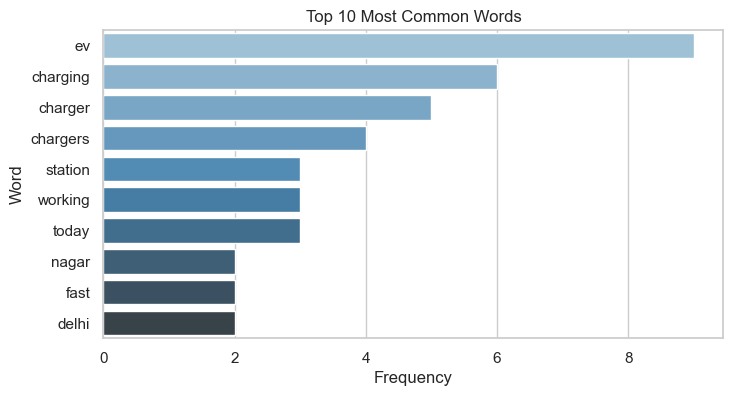

In [39]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize all cleaned tweets
all_words = ' '.join(df['Cleaned_Tweet']).split()

# Remove stopwords
filtered_words = [word for word in all_words if word not in stop_words]

# Get top 10
word_freq = Counter(filtered_words).most_common(10)
common_words_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='Blues_d')
plt.title('Top 10 Most Common Words')
plt.show()


# Stacked Bar Chart of Sentiment by Location

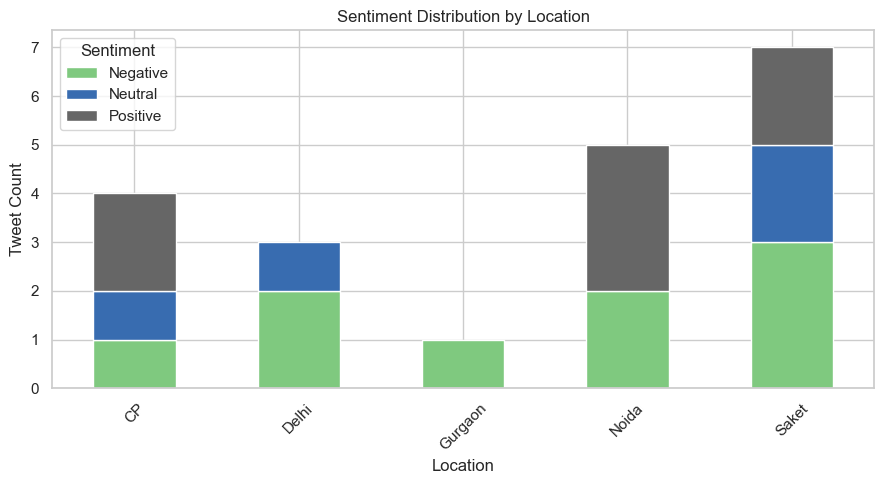

In [41]:
# Example: Let's extract fake locations from tweets (optional feature engineering)
import numpy as np
df['Location'] = np.random.choice(['Noida', 'Gurgaon', 'Delhi', 'CP', 'Saket'], size=len(df))

# Group and pivot
loc_sent = df.groupby(['Location', 'Sentiment']).size().unstack().fillna(0)

# Plot
loc_sent.plot(kind='bar', stacked=True, colormap='Accent', figsize=(9, 5))
plt.title('Sentiment Distribution by Location')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
